# Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
from skimage import io

# How to read,write and show image

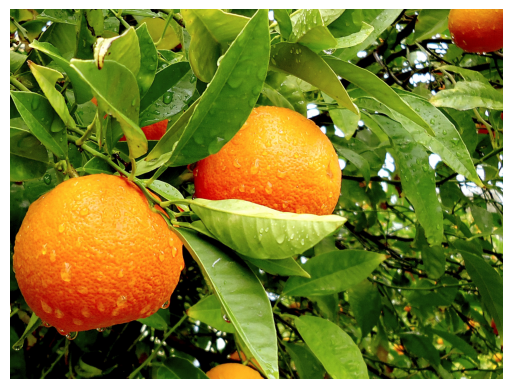

In [2]:
# read image:
img = cv2.imread('orange.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [3]:
# show image with opencv command
cv2.imshow('Orange', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

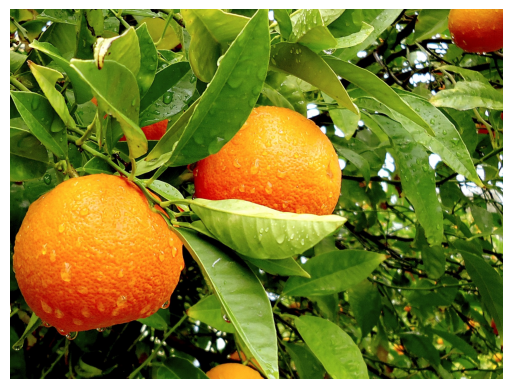

In [4]:
# write image:
img_copy = cv2.imwrite('orange_copy.jpg', img)
img = cv2.imread('orange_copy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize

In [5]:
# find the orginal image size
img = cv2.cvtColor(cv2.imread('surfing.jpg'), cv2.COLOR_BGR2RGB)
height = img.shape[0]
width = img.shape[1]
channel = img.shape[2]

In [6]:
height, width, channel

(2806, 3953, 3)

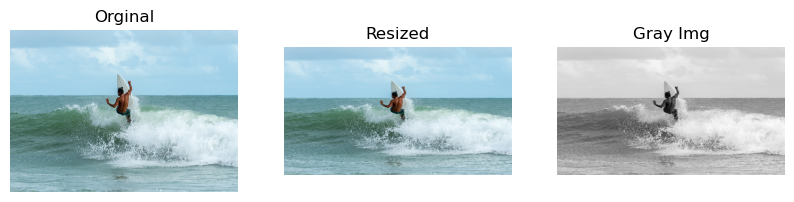

In [7]:
img_resize = cv2.resize(img,(640, 360))
gray_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
img_list = [img, img_resize, gray_img]
img_title = ['Orginal', 'Resized', 'Gray Img']

fig = plt.subplots(1, 3, figsize=(10,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i], cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

In [8]:
#resize and write image:
img = cv2.imread('orange.jpg')
res = cv2.resize(img,(500, 400))
res = cv2.imwrite('orange_resized.jpg', res)

# Croping

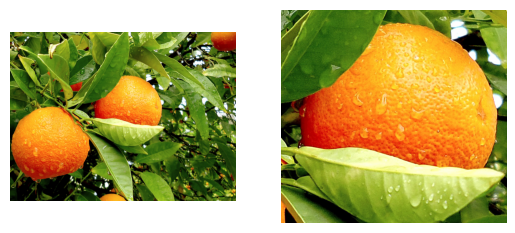

In [9]:
import cv2
img = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)
crop = img[280:800, 550:1100]  # img[y:y+h, x:x+w]
img_list = [img, crop]
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(img_list[i])
    plt.axis('off')
plt.show()

# Fliping

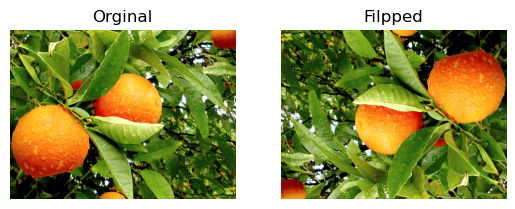

In [10]:
import cv2
img = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)
flip = cv2.flip(img, -1) # vertical flip = 0, horizontal flip = 1 , vertical+horizontal flip = -1
img_list = [img,flip]
img_title = ['Orginal', 'Filpped']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(img_list[i])
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

# Converting image to grayscale

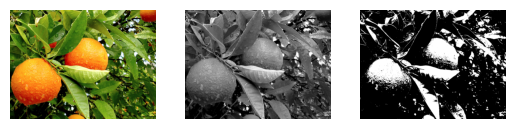

In [11]:
img = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,threshold = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
img_list = [img, gray_img, threshold]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i],cmap='gray')
    plt.axis('off')
plt.show()

# Converting images BGR to HSV & LAB

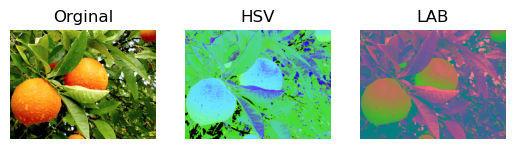

In [12]:
img = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_list = [img, hsv, lab]
img_title = ['Orginal', 'HSV', 'LAB']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i])
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

# Color space

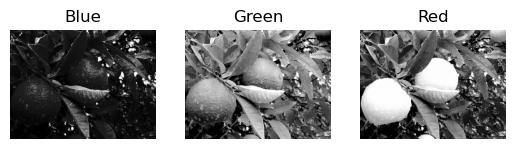

In [13]:
# split image
img = cv2.imread('orange.jpg')
b,g,r = cv2.split(img)

img_list = [b, g, r]
img_title = ['Blue', 'Green', 'Red']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i], cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

In [14]:
#Merge the splited image:
merged_img = cv2.merge([b, g, r])
cv2.imshow('Merged img', merged_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
img.shape[:2]

(1200, 1600)

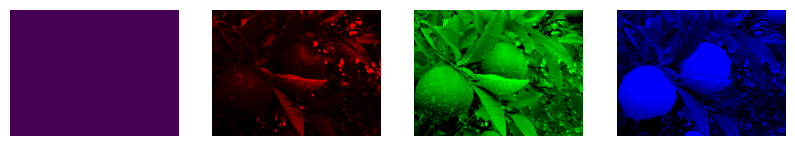

In [16]:
#filling merged image with blue green and red color:
blank = np.zeros(img.shape[:2], dtype='uint8') #create a blank image

blue = cv2.merge([b, blank, blank])
green = cv2.merge([blank, g, blank])
red = cv2.merge([blank, blank, r])

img_list = [blank, blue, green, red]

# show image using plt command(plt show inverted(BGR) color)
fig = plt.subplots(1, 4, figsize=(10,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(img_list[i])
    plt.axis('off')
plt.show()

# Blur image

In [17]:
img = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)

## Gaussian Blur

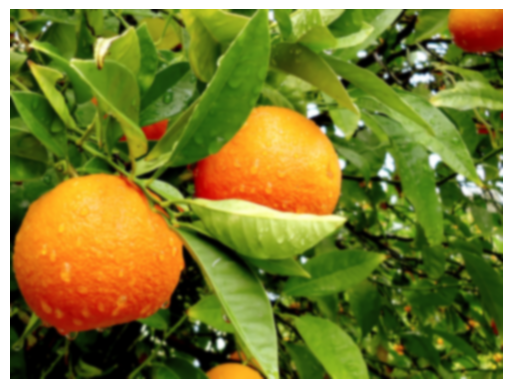

In [18]:
gaussian = cv2.GaussianBlur(img, (51, 51), cv2.BORDER_DEFAULT) #higer kernel higer blur.kernel must be odd.
plt.imshow(gaussian)
plt.axis('off')
plt.show()

## Blur

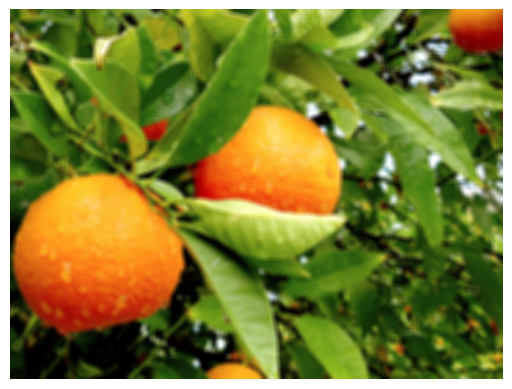

In [19]:
blur = cv2.blur(img, (19, 19))
plt.imshow(blur)
plt.axis('off')
plt.show()

## Median Blur
**best result in salt and paper noise**

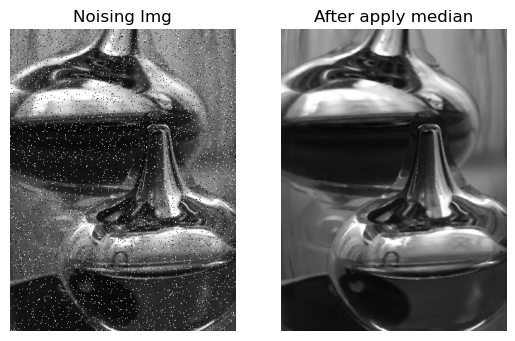

In [20]:
salt_paper = cv2.imread('Noise_salt_and_pepper.png', 0)
median = cv2.medianBlur(salt_paper, 3) #kernel size = 3

plt.subplot(1, 2, 1)
plt.imshow(salt_paper, cmap='gray')
plt.title('Noising Img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median, cmap='gray')
plt.title('After apply median')
plt.axis('off')

plt.show()

## Bilateral Blur
**preserve image broder and make smooth**

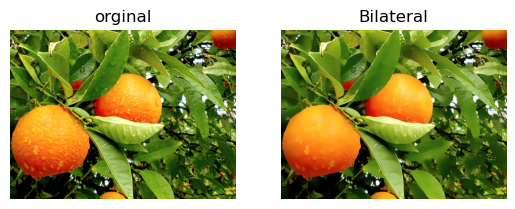

In [21]:
bilateral = cv2.bilateralFilter(img, 50, 50, 50) #cv2.bilateral(img,diameter,sigmaColor,sigmaSpace)

img_list = [img, bilateral]
img_title = ['orginal', 'Bilateral']

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(img_list[i], cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

# Thresholding

## i.Simple Thresholding

### Binary & Binary Inverse Thresholding

ret,thresh = cv2.threshold(img, thesh value, maximium thresh val which is 255, type = thresholding type like cv2.THRESH_BINARY)

- threshod gives two result(ret and thresh).but we will use thresh only.
- if thresholding value is set 120 then the pixel of image less than 120 will be 0
- and the pixel of image greater than 120 will be 255.

In [22]:
img = cv2.imread('gradient.png')

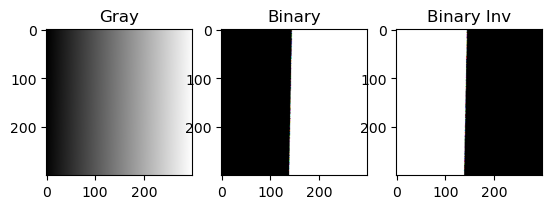

In [23]:
ret,thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret,thresh1 = cv2.threshold(img,120, 255, cv2.THRESH_BINARY_INV)


plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gray')
plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Binary')
plt.subplot(1, 3, 3)
plt.imshow(thresh1, cmap='gray')
plt.title('Binary Inv')
plt.show()

### Trunc Thresholding
- Trunc Thresholding technique is change the higher pixel of image's value = threshold value.
- Lets assume thres = 120. then all the image's pixels greather than 120 changed into 120.
- But lower than 120 pixels value remain unchanged.

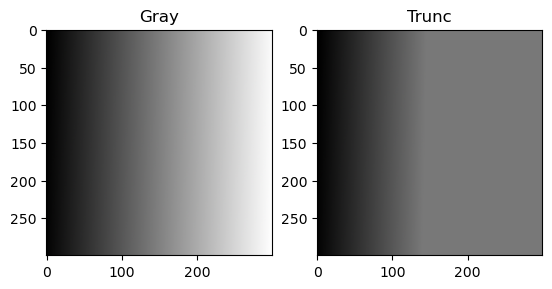

In [24]:
ret,thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)

plt.subplot(1, 2, 1)
plt.imshow(img,cmap='gray')
plt.title('Gray')

plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Trunc')

plt.show()

### Tozero & Tozero Inverse Thresholding
**tozero thecnique makes the lower pixel of threshold value into zero(0)**

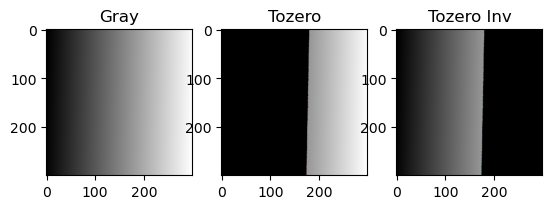

In [25]:
ret,thresh_tozero = cv2.threshold(img, 150, 255, cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(img, 150, 255, cv2.THRESH_TOZERO_INV)

img_list = [img, thresh_tozero, thresh_tozero_inv]
img_title = ['Gray', 'Tozero', 'Tozero Inv']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i],cmap='gray')
    plt.title(img_title[i])
plt.show()


## ii.Adaptive Thresholding
- **thresh = cv2.adaptiveThreshold(img, max pixel value, adaptive model, threshod type, block size(size of neighbourhood area, c(constant))**

In [26]:
img = cv2.imread('sudoku.jpg', 0) #convert bgr2gray

In [27]:
# simple thresholding technique
ret, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

### ADAPTIVE_THRESH_MEAN_C

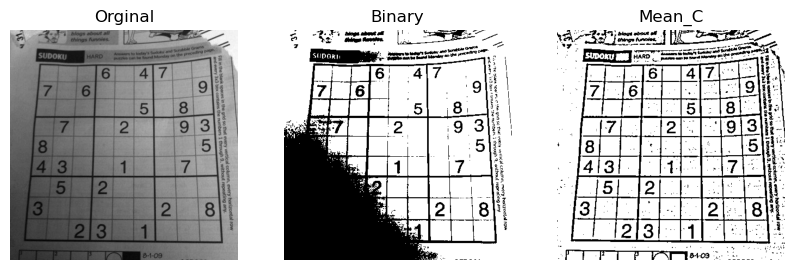

In [28]:
adapt_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

img_list = [img, thresh, adapt_thresh]
img_title = ['Orginal', 'Binary', 'Mean_C']
fig = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i], cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

In [29]:
adapt_thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### ADAPTIVE_THRESH_GAUSSIAN_C

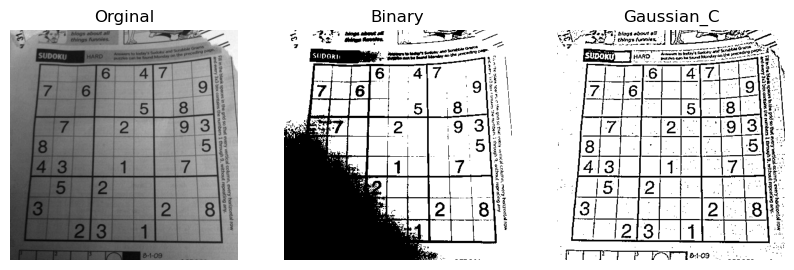

In [30]:
adapt_gaus_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)

img_list = [img, thresh, adapt_gaus_thresh]
img_title = ['Orginal','Binary','Gaussian_C']
fig = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_list[i],cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

### Otsu Thresholding

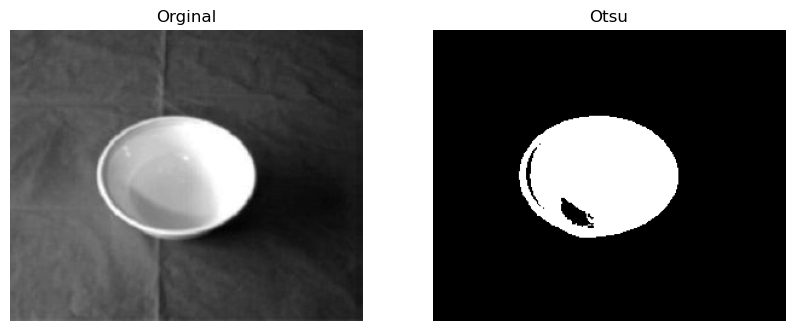

In [31]:
img = cv2.imread('image.jpg',0) 
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

img_list = [img, thresh]
img_title = ['Orginal', 'Otsu']

fig = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(img_list[i],cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

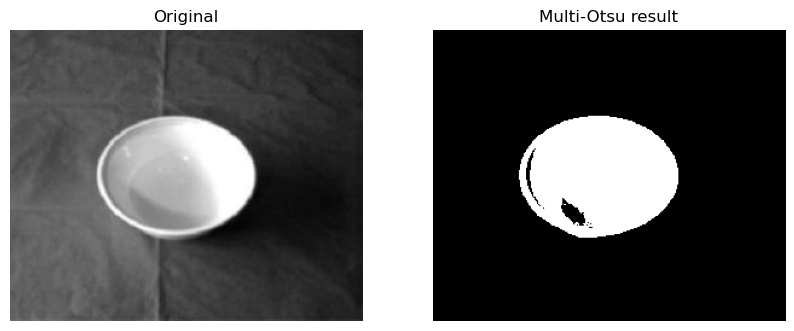

In [32]:
image = cv2.imread('image.jpg',0)

# Apply multi-Otsu thresholding with 2 classes
thresholds = threshold_multiotsu(image, classes=2)
regions = np.digitize(image, bins=thresholds)

# Display the original and segmented images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions, cmap='gray')
ax[1].set_title('Multi-Otsu result')
ax[1].axis('off')
plt.show()

# Morphological Transform

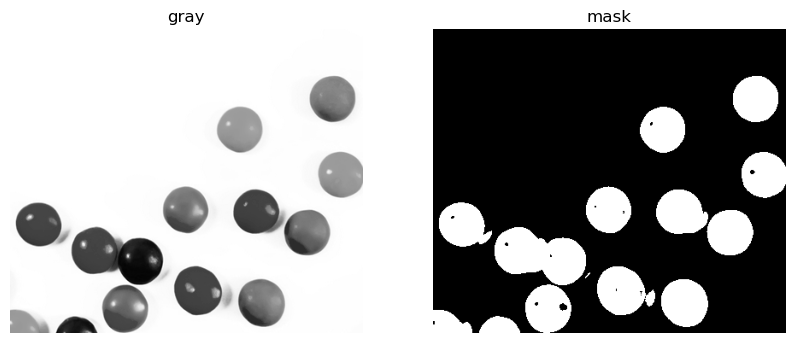

In [33]:
img = cv2.imread('smarties.png',0)
# create a mask
ret, mask = cv2.threshold(img,  200, 255, cv2.THRESH_BINARY_INV)

img_list = [img, mask]
img_title = ['gray', 'mask']
fig = plt.subplots(1, 2, figsize=(10,5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(img_list[i],cmap='gray')
    plt.title(img_title[i])
    plt.axis('off')
plt.show()

In [34]:
kernel = np.ones((5, 5),np.uint8)

## Erosion
- **The basic idea of erosion is just like soil erosion only,** 
- **it erodes away the boundaries of foreground object (Always try to keep foreground in white)**

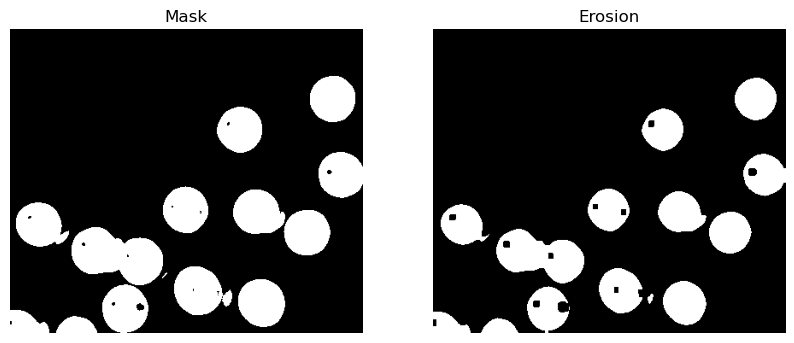

In [35]:
erode = cv2.erode(mask,kernel,iterations=1)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erode,cmap='gray')
plt.title('Erosion')
plt.axis('off')
plt.show()

## Dilation
- **it increases the white region in the image or size of foreground object increases.**

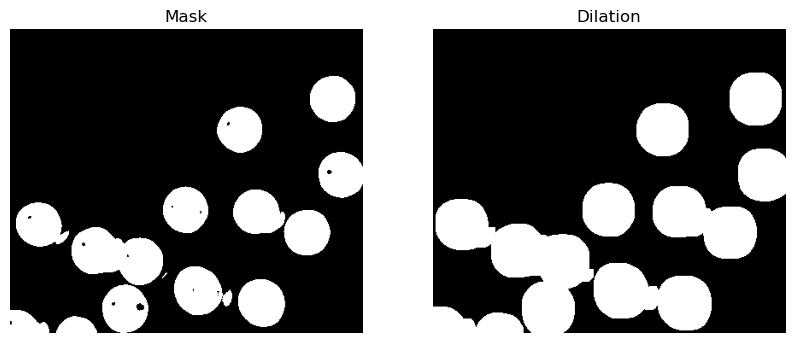

In [36]:
dilate = cv2.dilate(mask,kernel,iterations=2)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilate,cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.show()

## Opening
**Opening is just another name of erosion followed by dilation. It is useful in removing noise**

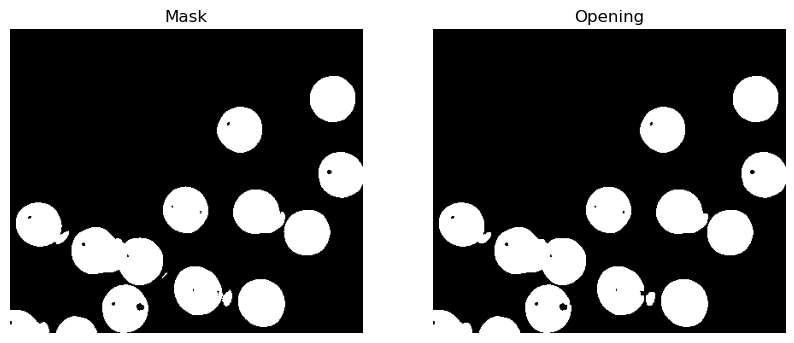

In [37]:
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening,cmap='gray')
plt.title('Opening')
plt.axis('off')

plt.show()

## Closing 
**Closing is reverse of Opening. It is useful in closing small holes inside the foreground objects, or small black points on** **the object.**

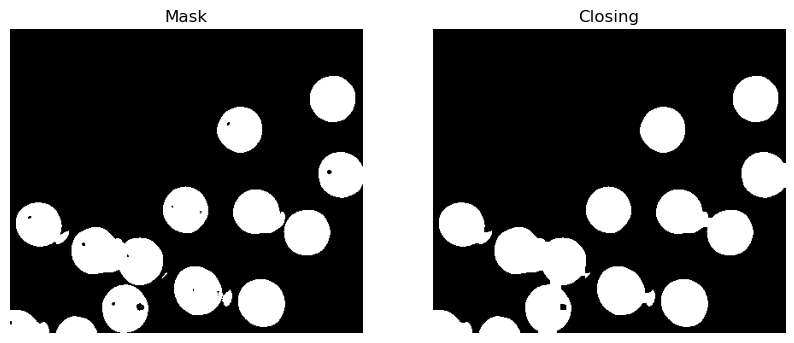

In [38]:
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closing,cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.show()

## Morphological Gradient

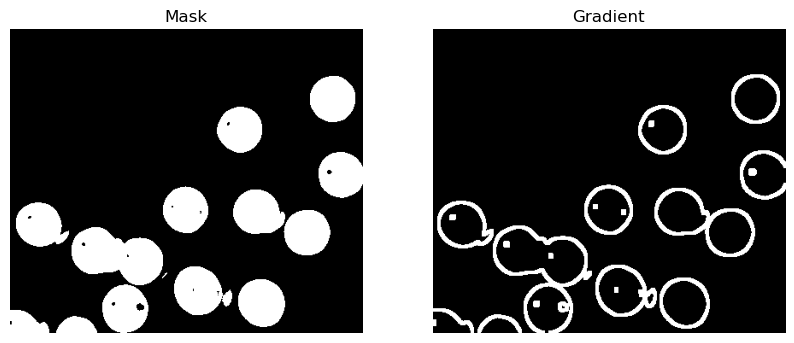

In [39]:
grad = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernel)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grad,cmap='gray')
plt.title('Gradient')
plt.axis('off')

plt.show()

## Top Hat

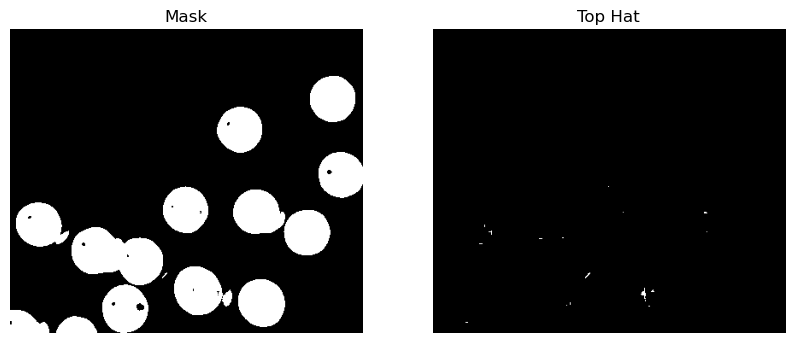

In [40]:
th = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernel)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(th,cmap='gray')
plt.title('Top Hat')
plt.axis('off')

plt.show()

## Balck Hat

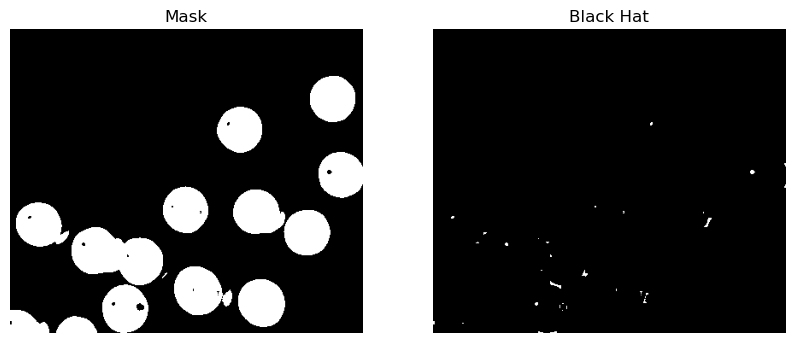

In [41]:
bh = cv2.morphologyEx(mask,cv2.MORPH_BLACKHAT,kernel)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bh,cmap='gray')
plt.title('Black Hat')
plt.axis('off')
plt.show()

# Image Gradients & Edge Detection

In [42]:
img = cv2.imread('sudoku.jpg',0)

## Laplacian

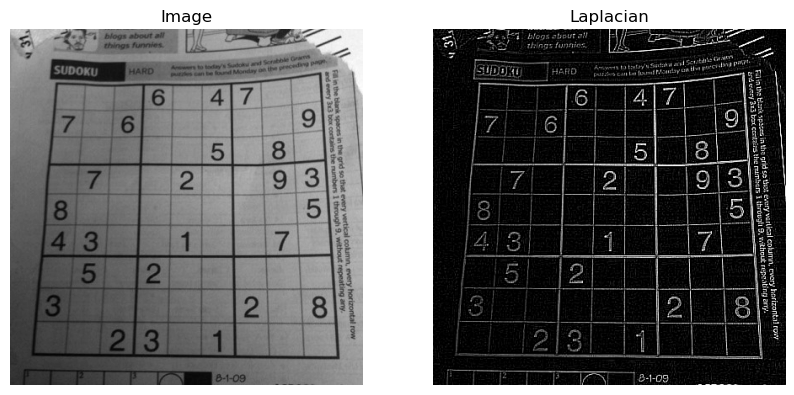

In [43]:
lap = cv2.Laplacian(img, -1, cv2.CV_64F, ksize=3)#CV_64F=float data that include pos & neg value, depth=-1(convert into uint8)

fig = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lap, cmap='gray')
plt.title('Laplacian')
plt.axis('off')
plt.show()

## SobelX

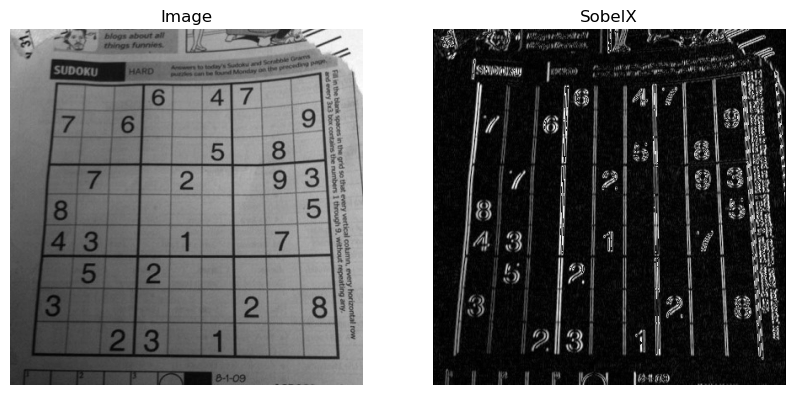

In [44]:
sX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # dx = 1 & dy = 0
sX = np.uint8(np.absolute(sX)) # convert into uint8

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sX, cmap='gray')
plt.title('SobelX')
plt.axis('off')

plt.show()

## SobelY

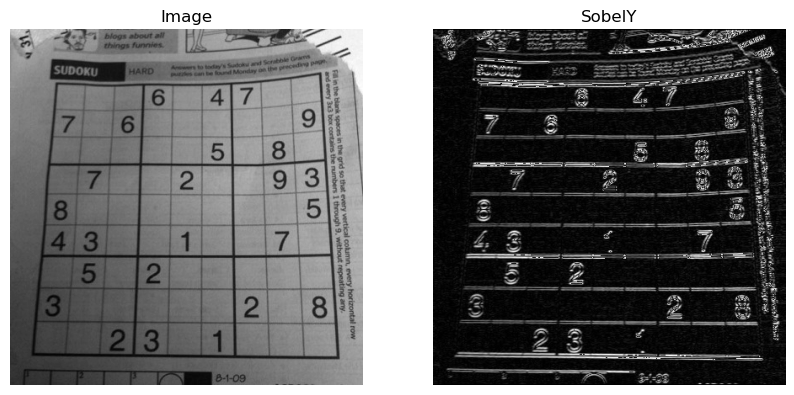

In [45]:
sY = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # dx = 0 & dy = 1
sY = np.uint8(np.absolute(sY)) # convert into uint8

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1 ,2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sY, cmap='gray')
plt.title('SobelY')
plt.axis('off')

plt.show()

## SobelX & SobelY Combined

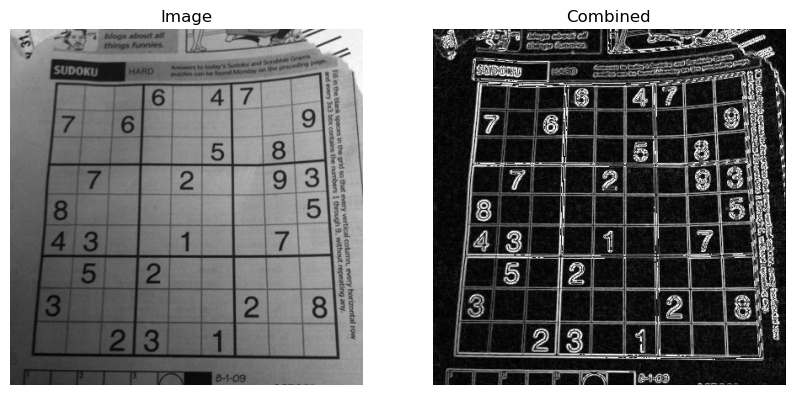

In [46]:
s_XY = cv2.bitwise_or(sX, sY)

fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(s_XY, cmap='gray')
plt.title('Combined')
plt.axis('off')
plt.show()

# Canny Edge Detection

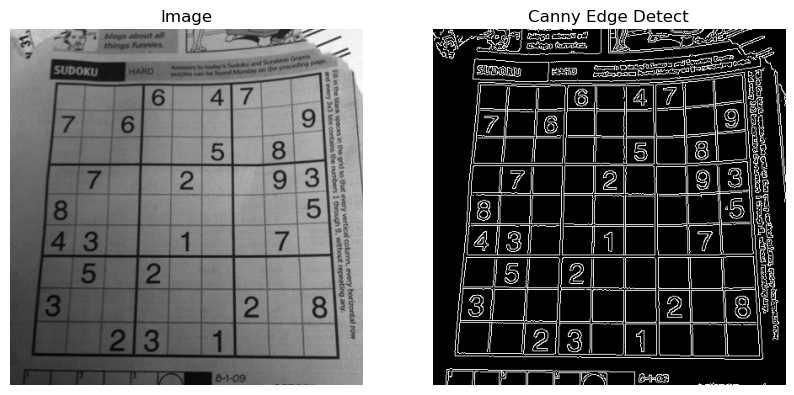

In [47]:
img = cv2.imread('sudoku.jpg', 0)
canny_edge = cv2.Canny(img, 80, 40)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.axis('off')\

plt.subplot(1,2,2)
plt.imshow(canny_edge,cmap='gray')
plt.title('Canny Edge Detect')
plt.axis('off')

plt.show()

# Histogram

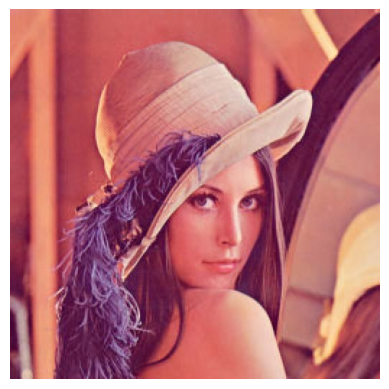

In [48]:
img = cv2.imread('Lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

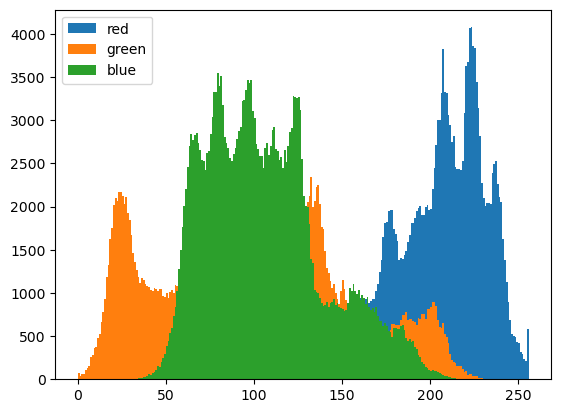

In [49]:
r,g,b = cv2.split(img)

plt.hist(r.ravel(), 256, [0, 256], label='red')
plt.hist(g.ravel(), 256, [0, 256], label='green')
plt.hist(b.ravel(), 256, [0, 256], label='blue')
plt.legend()
plt.show()

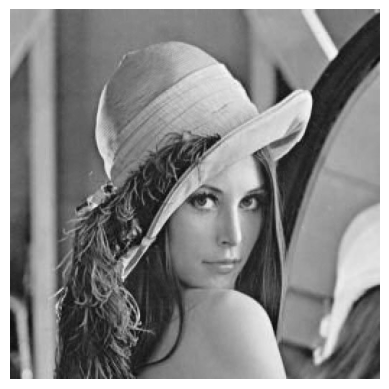

In [50]:
img = cv2.imread('Lena.jpg', 0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

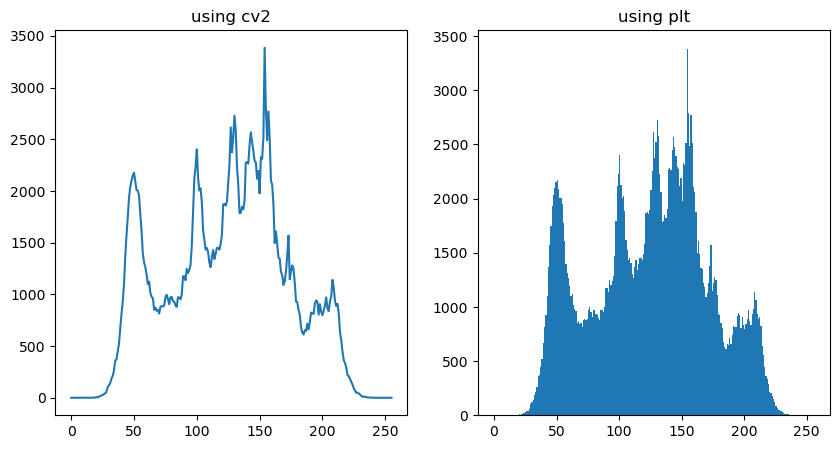

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
hist = cv2.calcHist([img], [0], None , [256], [0, 256])
plt.plot(hist)
plt.title('using cv2')

plt.subplot(1,2,2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('using plt')
plt.show()

# Histogram Equilization

## 1.For Gray Image

In [52]:
img = cv2.imread('Lena.jpg', 0)

### Simple Histogram Equilization

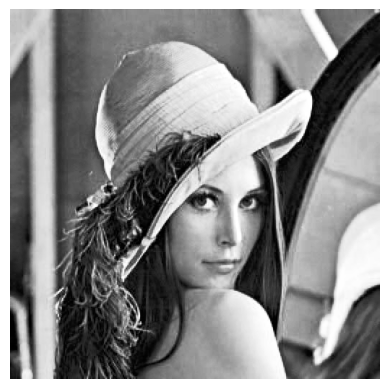

In [53]:
he = cv2.equalizeHist(img) #image should be in gray
plt.imshow(he, cmap='gray')
plt.axis('off')
plt.show()

### Contrast Limited Adaptive Histogram Equilization(CLAHE)

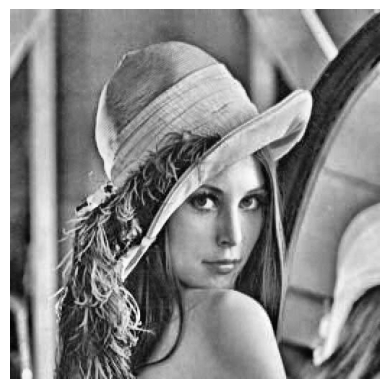

In [54]:
clahe = cv2.createCLAHE(clipLimit=2) #image should be in gray
f_img = clahe.apply(img)
plt.imshow(f_img, cmap='gray')
plt.axis('off')
plt.show()

### More Example

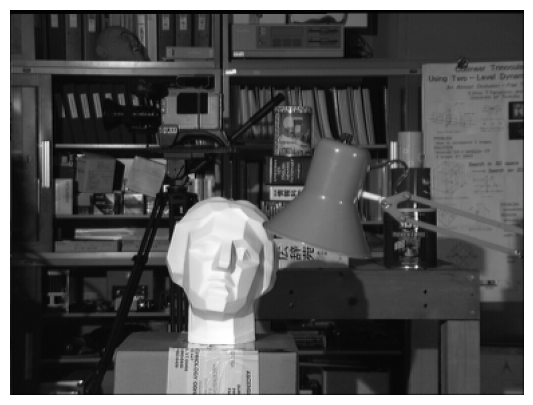

In [55]:
img = cv2.imread('tsukuba.png', 0)

plt.figure(figsize=(10,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

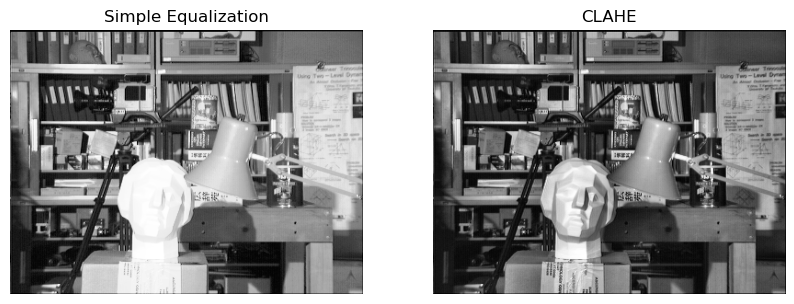

In [56]:
#simple equalization
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
hist_equ = cv2.equalizeHist(img)
plt.imshow(hist_equ, cmap='gray')
plt.title('Simple Equalization')
plt.axis('off')

#clahe
plt.subplot(1, 2, 2)
c = cv2.createCLAHE(clipLimit=2)
c_img = c.apply(img)
plt.imshow(c_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

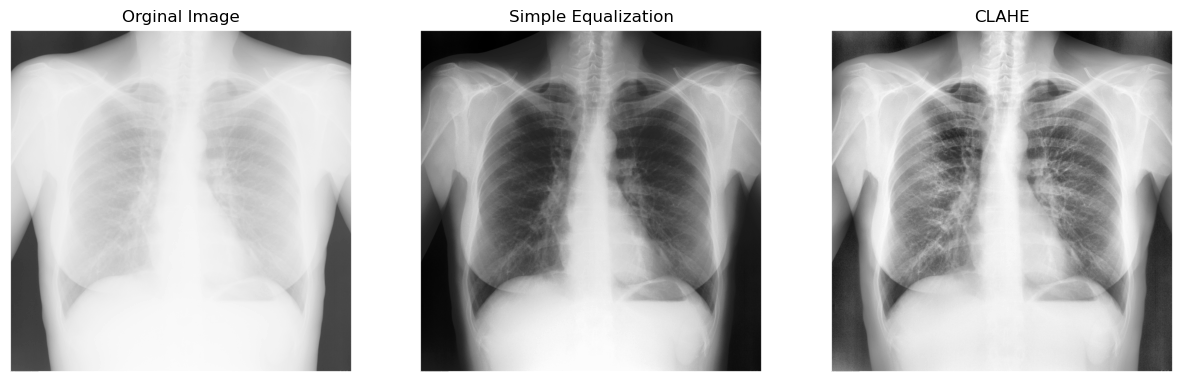

In [57]:
# another example
img = cv2.imread('x-ray.jfif', 0)

plt.figure(figsize=(15,5))
#orginal image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orginal Image')
plt.axis('off')

#simple equalization
plt.subplot(1, 3, 2)
hist_equ = cv2.equalizeHist(img)
plt.imshow(hist_equ, cmap='gray')
plt.title('Simple Equalization')
plt.axis('off')

#clahe
plt.subplot(1, 3, 3)
c = cv2.createCLAHE(clipLimit=5)
c_img = c.apply(img)
plt.imshow(c_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

## 2.For Colored Image
**steps:**
- convert bgr2rgb
- convert rgb2hsv
- split image
- work only v value
- equalization apply
- merged image and convert hsv2rgb

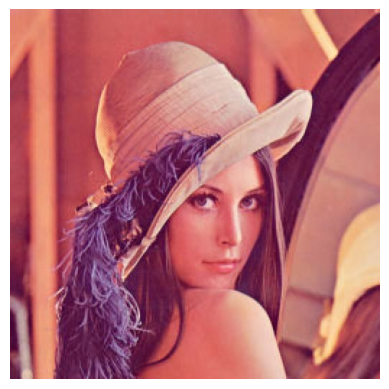

In [58]:
img = cv2.imread('Lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

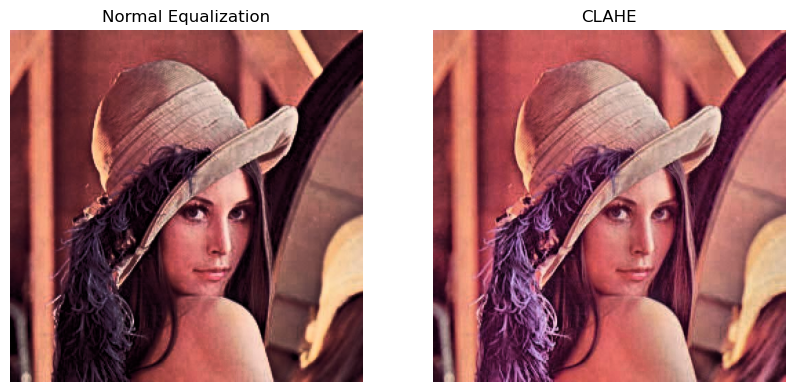

In [59]:
plt.figure(figsize=(10, 5))
#normal Equalizer
plt.subplot(1, 2, 1)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
n_v = cv2.equalizeHist(v)
n_hsv = cv2.merge((h, s, n_v))
n_rgb = cv2.cvtColor(n_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(n_rgb)
plt.title('Normal Equalization')
plt.axis('off')

#clahe
plt.subplot(1, 2, 2)
cl = cv2.createCLAHE(clipLimit=2)
cl_v = cl.apply(v)
cl_hsv = cv2.merge((h, s, cl_v))
cl_rgb = cv2.cvtColor(cl_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(cl_rgb)
plt.title('CLAHE')
plt.axis('off')

plt.show()

# Size of image

In [60]:
img = cv2.imread('mountain.png')
size = img.shape
print(size[:2])
print('Height:', size[0], 'Width:', size[1])

(480, 640)
Height: 480 Width: 640


# Brightness of image

Brightness of Image: 137.760693359375


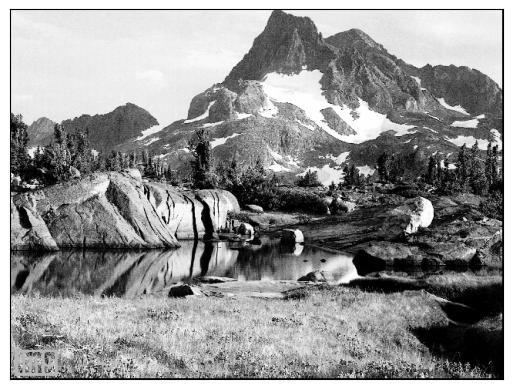

In [61]:
img = cv2.imread('mountain.png')
br = cv2.mean(img)[0]
plt.imshow(img)
plt.xticks([]),plt.yticks([])
print('Brightness of Image:', br)

# Minimum Bits per pixel (bpp)?


In [62]:
dtype = img.dtype
if dtype == 'uint8':
    min_bpp = np.log2(256)
    print(min_bpp)
elif dtype == 'uint16':
    min_bpp = np.log2(65536)
    print(min_bpp)
else:
    print('unknown data type image')

8.0


# Original image histogram

# Finding Mean

0.7188962246182318


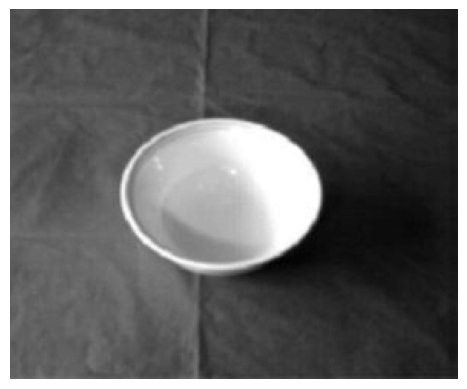

In [63]:
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show image:
plt.imshow(gray, cmap='gray')
plt.axis('off')
t = 0.5
epst = 0.01

d = gray.astype(float) / 255.0
while 1:
    mL = d[d<=t].mean()
    mH = d[d>t].mean()

    t_new = (mL+mH)/2

    if abs(t-t_new) < epst:
        break
    t = t_new
print(t)